In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
import pathlib
import random

In [2]:
path = 'C:/Users/Somit Jain/Downloads/TARP/FaceScrub/FaceScrubDataset'
data_dir = pathlib.Path(path)

In [3]:
for (dirname, _, filenames) in os.walk(path, topdown=True):
  for filename in filenames:
    print(os.path.join(dirname, filename))

C:/Users/Somit Jain/Downloads/TARP/FaceScrub/FaceScrubDataset\Aaron_Eckhart\Aaron_Eckhart_105_83.jpeg
C:/Users/Somit Jain/Downloads/TARP/FaceScrub/FaceScrubDataset\Aaron_Eckhart\Aaron_Eckhart_108_84.jpeg
C:/Users/Somit Jain/Downloads/TARP/FaceScrub/FaceScrubDataset\Aaron_Eckhart\Aaron_Eckhart_109_85.jpeg
C:/Users/Somit Jain/Downloads/TARP/FaceScrub/FaceScrubDataset\Aaron_Eckhart\Aaron_Eckhart_110_86.jpeg
C:/Users/Somit Jain/Downloads/TARP/FaceScrub/FaceScrubDataset\Aaron_Eckhart\Aaron_Eckhart_113_88.jpeg
C:/Users/Somit Jain/Downloads/TARP/FaceScrub/FaceScrubDataset\Aaron_Eckhart\Aaron_Eckhart_118_92.jpeg
C:/Users/Somit Jain/Downloads/TARP/FaceScrub/FaceScrubDataset\Aaron_Eckhart\Aaron_Eckhart_11_11.jpeg
C:/Users/Somit Jain/Downloads/TARP/FaceScrub/FaceScrubDataset\Aaron_Eckhart\Aaron_Eckhart_122_94.jpeg
C:/Users/Somit Jain/Downloads/TARP/FaceScrub/FaceScrubDataset\Aaron_Eckhart\Aaron_Eckhart_130_99.jpeg
C:/Users/Somit Jain/Downloads/TARP/FaceScrub/FaceScrubDataset\Aaron_Eckhart\Aaron_E

In [4]:
print(data_dir)

C:\Users\Somit Jain\Downloads\TARP\FaceScrub\FaceScrubDataset


C:\Users\Somit Jain\Downloads\TARP\FaceScrub\FaceScrubDataset\Anne_Hathaway\Anne_Hathaway_73944_33464.jpeg


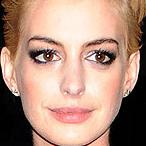

In [5]:
s1 = list(data_dir.glob('Anne_Hathaway/*'))
print(s1[0])
PIL.Image.open(str(s1[6]))

In [7]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.25,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 42848 files belonging to 526 classes.
Using 32136 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.25,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 42848 files belonging to 526 classes.
Using 10712 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)
print(len(class_names))

['Aaron_Eckhart', 'Adam_Brody', 'Adam_McKay', 'Adam_Sandler', 'Adrien_Brody', 'Adrienne_Barbeau', 'Adrienne_Frantz', 'Aisha_Hinds', 'Al_Pacino', 'Alan_Alda', 'Alan_Arkin', 'Alan_Rickman', 'Alec_Baldwin', 'Alfred_Molina', 'Alice_Krige', 'Alley_Mills', 'Allison_Janney', 'Alyson_Hannigan', 'Alyssa_Milano', 'Amanda_Bearse', 'Amaury_Nolasco', 'America_Ferrera', 'Amy_Davidson', 'Andrea_Anders', 'Andrea_Bogart', 'Andrea_Bowen', 'Andy_Garcia', 'Andy_Richter', 'Andy_Serkis', 'Angell_Conwell', 'Angie_Harmon', 'Anne_Hathaway', 'Annie_Ilonzeh', 'Anthony_Hopkins', 'Anthony_Stewart_Head', 'Antonio_Banderas', 'Arnold_Schwarzenegger', 'Arnold_Vosloo', 'Ashley_Benson', 'Ashley_Johnson', 'Ashley_Jones', 'Ashton_Kutcher', 'Audra_McDonald', 'Audrey_Landers', 'Barbara_Carrera', 'Ben_Affleck', 'Ben_Kingsley', 'Ben_McKenzie', 'Ben_Stiller', 'Benicio_Del_Toro', 'Bernard_Hill', 'Bernie_Mac', 'Bill_Cosby', 'Bill_Hader', 'Bill_Murray', 'Bill_Nighy', 'Billy_Bob_Thornton', 'Billy_Boyd', 'Billy_Burke', 'Billy_Zane'

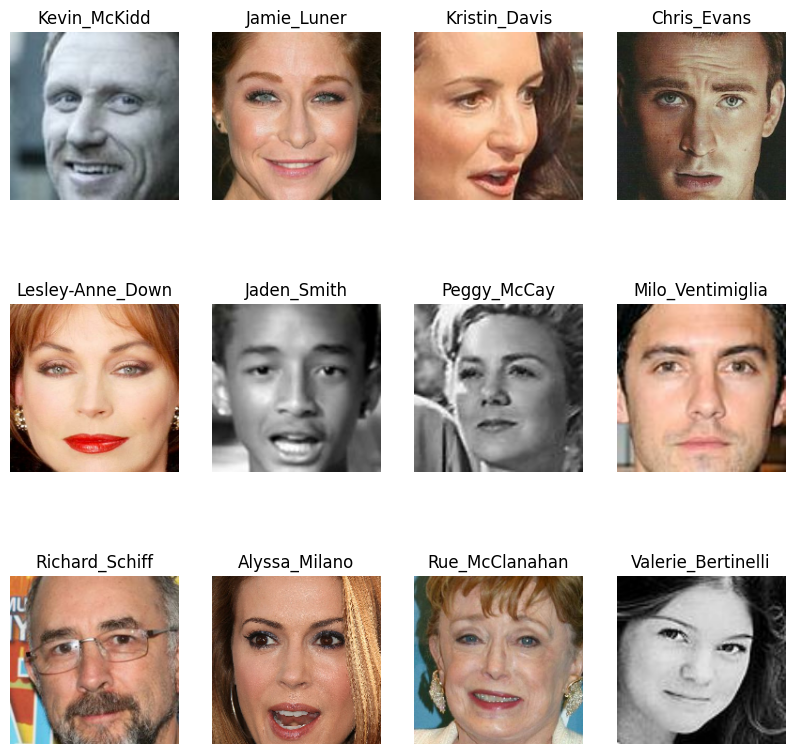

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=526,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(180, activation='relu'))
resnet_model.add(Dense(526, activation='softmax'))

In [12]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 180)              368820    
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 526)              95206     
 pper)                                                           
                                                                 
Total params: 24,051,738
Trainable params: 464,026
Non-trainable params: 23,587,712
______________________________________

In [13]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
1005/1005 [==============================] - 2614s 3s/step - loss: 5.5881 - accuracy: 0.0209 - val_loss: 5.0342 - val_accuracy: 0.0442
Epoch 2/10
1005/1005 [==============================] - 2594s 3s/step - loss: 4.7159 - accuracy: 0.0705 - val_loss: 4.5445 - val_accuracy: 0.0825
Epoch 3/10
1005/1005 [==============================] - 2593s 3s/step - loss: 4.3322 - accuracy: 0.1116 - val_loss: 4.3192 - val_accuracy: 0.1073
Epoch 4/10
1005/1005 [==============================] - 2606s 3s/step - loss: 4.1035 - accuracy: 0.1369 - val_loss: 4.1470 - val_accuracy: 0.1302
Epoch 5/10
1005/1005 [==============================] - 2595s 3s/step - loss: 3.9346 - accuracy: 0.1588 - val_loss: 4.0100 - val_accuracy: 0.1505
Epoch 6/10
1005/1005 [==============================] - 2585s 3s/step - loss: 3.8050 - accuracy: 0.1769 - val_loss: 3.9123 - val_accuracy: 0.1665
Epoch 7/10
1005/1005 [==============================] - 2590s 3s/step - loss: 3.7021 - accuracy: 0.1936 - val_loss: 3.8562 -

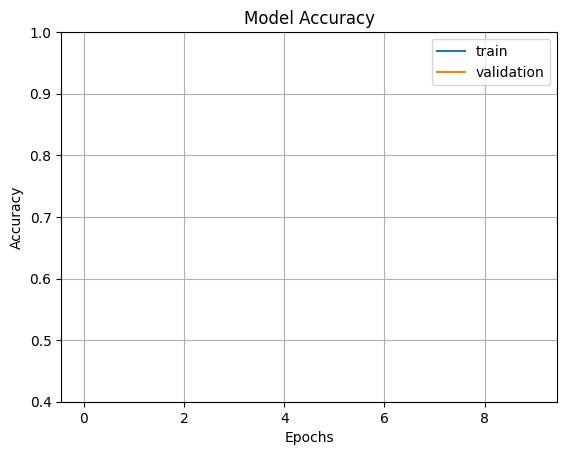

In [15]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

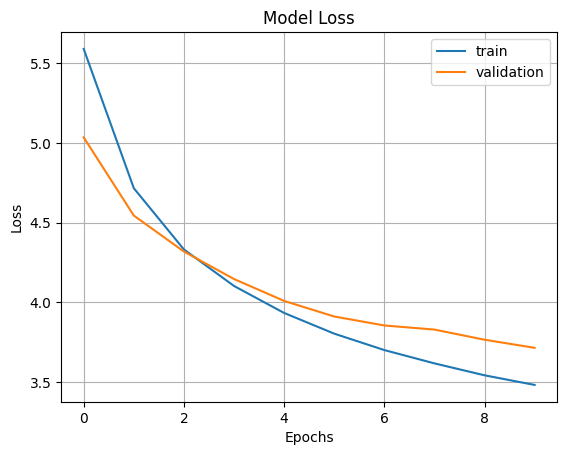

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()